In [1]:
import itertools

itertools là một module (thư viện) trong Python cung cấp các công cụ giúp thực hiện các thao tác với các iterable (các đối tượng có thể lặp lại) một cách hiệu quả và linh hoạt. itertools chứa một bộ các hàm và công cụ mạnh mẽ để tạo và xử lý các chuỗi, danh sách, hoặc bất kỳ loại iterable nào. Dưới đây là một số hàm quan trọng trong itertools:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

-  NullFormatter là một class được import từ module matplotlib.ticker. Class này được sử dụng để tạo đối tượng định dạng (formatter object) để tùy chỉnh cách các giá trị trên trục của biểu đồ được hiển thị.

- NullFormatter thường được sử dụng khi bạn muốn tắt định dạng (formatter) cho trục cụ thể trên biểu đồ. Nó thường được kết hợp với NullLocator để ẩn hoặc không hiển thị các dấu tick (dấu ghi) trên trục đó. Điều này có thể hữu ích trong trường hợp bạn muốn chỉ hiển thị biểu đồ mà không muốn hiển thị các giá trị trục hoặc bạn đã tự tạo các dấu tick tùy chỉnh và muốn tắt định dạng tự động của matplotlib.

In [3]:
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
link='https://drive.google.com/file/d/1Bli1gOaO00lRjbIEBels68BlPrpFQ3dF/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
train = pd.read_csv(path,encoding= 'unicode_escape')

In [5]:
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [6]:
link='https://drive.google.com/file/d/1XlhCmiTP4JFdWTSMKXLTw48F8mz1KuSQ/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
test = pd.read_csv(path,encoding= 'unicode_escape')

In [7]:
test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


# **Thông tin các cột: Các thông tin về hoạt động của User (người dùng)**

**profile pic:** User có ảnh đại diện hay không? (1 - có ; 0 - không)

**nums/length username:** tỷ lệ giữa số và ký tự chữ cái trong tên Đăng nhập (username) của User

**fullname words**: **bold text** Có bao nhiêu từ trong tên đầy đủ (fullname) của User

**nums/length fullname:** tỷ lệ giữa số và ký tự chữ cái trong Tên đầy đủ của User

**name==username:** Tên đăng nhập và Tên đầy đủ của User có giống nhau không? (1 - có ; 0 - không)

**description length:** có bao nhiêu từ trong phần Giới thiệu của User?

**external URL:** User có một URL bên ngoài được liên kết với hồ sơ của họ không? (1 - có ; 0 - không)

**private**: Trang cá nhân của User có đặt chế độ Riêng tư (private) không? (1 - có ; 0 - không)

**posts:** Số bài đăng

**followers:** Số người theo dõi mà User (follower)

**follows:** Số người mà User theo dõi (follow)

**fake:** Tài khoản User có phải là tài khoản giả (fake) hay không? (1 - có ; 0 - không)

# KIỂM TRA - XỬ LÝ DATA

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [10]:
train_duplicated = train[train.duplicated(keep=False)]
train_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
196,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
491,1,0.91,1,0.0,0,0,0,0,0,75,26,1
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


In [11]:
test_duplicated = test[test.duplicated(keep=False)]
test_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
61,1,0.27,1,0.0,0,0,0,0,0,45,64,1
63,0,0.00,1,0.0,1,0,0,0,0,69,694,1
67,0,0.00,1,0.0,1,0,0,0,0,69,694,1
83,1,0.27,1,0.0,0,0,0,0,0,45,64,1


In [12]:
# loại bỏ các giá trị trùng lặp

train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [13]:
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [14]:
test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


<Axes: ylabel='fake'>

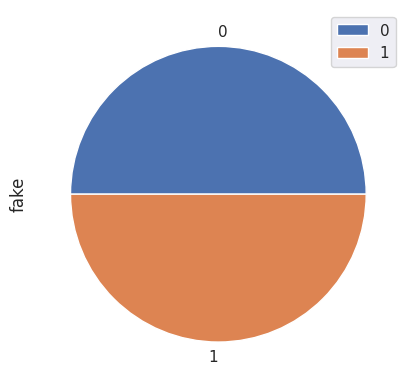

In [15]:
# kiểm tra data có mất cân bằng hay không -> cân bằng giá trị

train['fake'].value_counts().plot.pie(legend=['0','1'])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           574 non-null    int64  
 1   nums/length username  574 non-null    float64
 2   fullname words        574 non-null    int64  
 3   nums/length fullname  574 non-null    float64
 4   name==username        574 non-null    int64  
 5   description length    574 non-null    int64  
 6   external URL          574 non-null    int64  
 7   private               574 non-null    int64  
 8   #posts                574 non-null    int64  
 9   #followers            574 non-null    int64  
 10  #follows              574 non-null    int64  
 11  fake                  574 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 58.3 KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           118 non-null    int64  
 1   nums/length username  118 non-null    float64
 2   fullname words        118 non-null    int64  
 3   nums/length fullname  118 non-null    float64
 4   name==username        118 non-null    int64  
 5   description length    118 non-null    int64  
 6   external URL          118 non-null    int64  
 7   private               118 non-null    int64  
 8   #posts                118 non-null    int64  
 9   #followers            118 non-null    int64  
 10  #follows              118 non-null    int64  
 11  fake                  118 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 12.0 KB


# PHÂN TÍCH DATA

In [18]:
import statistics

<ipython-input-19-21f6453b3873>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['#posts'])


Standard Deviation of Number of posts is 402.68200161552676


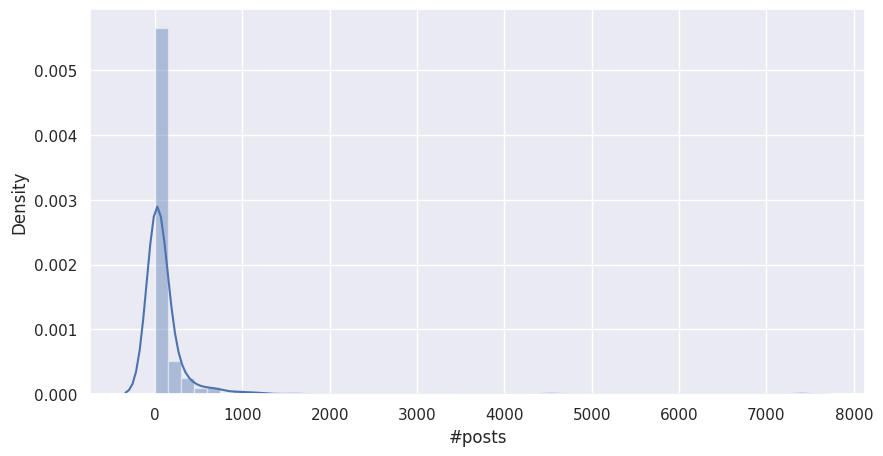

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(train['#posts'])
print('Standard Deviation of Number of posts is % s' % (statistics.stdev(train['#posts'])))

<ipython-input-20-dd6b1c329553>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['#followers'])


Standard Deviation of number of followers is 911722.338266849 


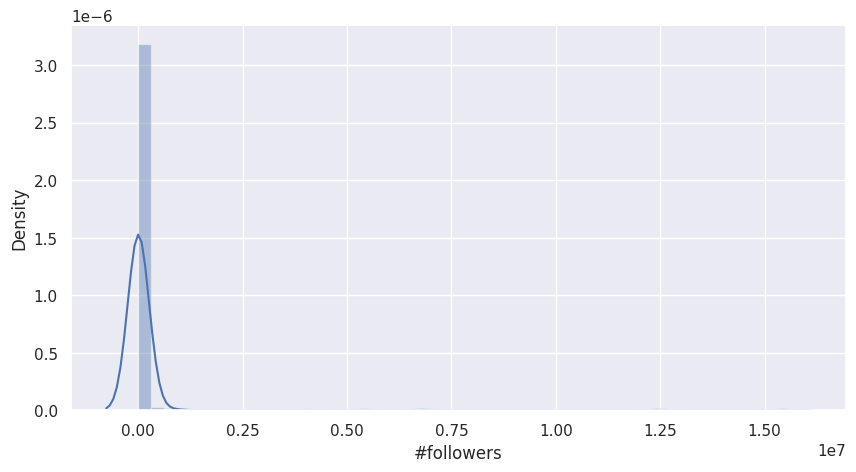

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(train['#followers'])
print("Standard Deviation of number of followers is % s "
                % (statistics.stdev(train['#followers'])))

<ipython-input-21-792189b29444>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['#follows'])


Standard Deviation of number of follows is 919.3413071390997


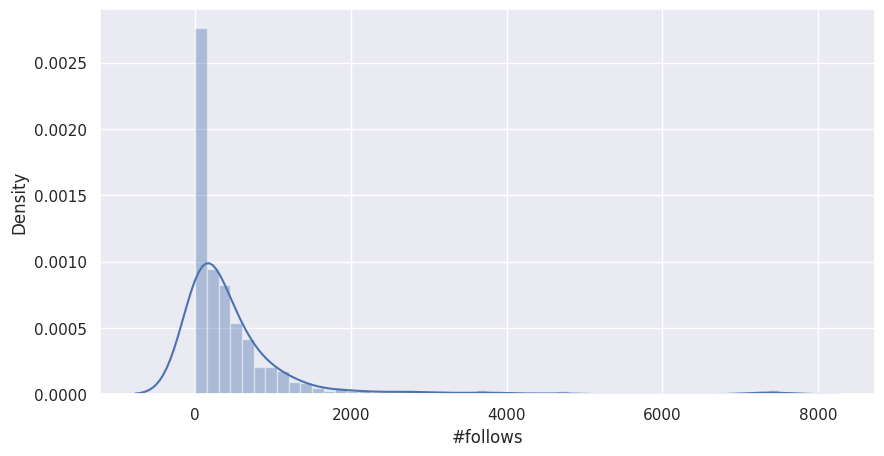

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(train['#follows'])
print('Standard Deviation of number of follows is % s' % (statistics.stdev(train['#follows'])))

In [22]:
# biểu đồ so sánh giữa tk Real(0) và Fake(1) theo các thuộc tính

# có profile picture hay không
# có url hay không
# có private hay không
# có name = username hay không

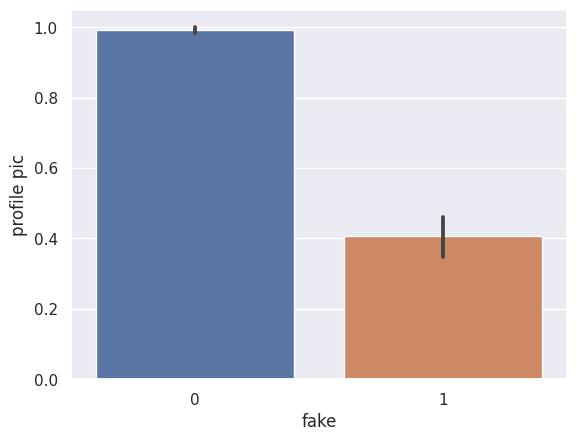

In [23]:
import seaborn as sns; sns.set()
import plotly.express as px

sns_plot = sns.barplot(data = train, x = 'fake', y = 'profile pic')

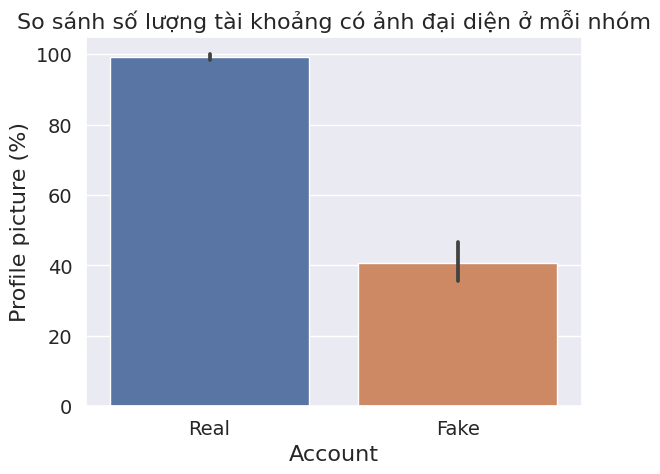

In [25]:
sns_plot = sns.barplot(data = train, x = 'fake', y = 'profile pic')
x = [0,1]
labels = ['Real', 'Fake']
plt.xticks(x, labels, fontsize = 14)
y = [0, 0.2, 0.4, 0.6, 0.8, 1]
labelsy = ['0','20','40','60','80','100']
plt.yticks(y, labelsy, fontsize = 14)
plt.xlabel('Account', fontsize = 16)
plt.ylabel('Profile picture (%)', fontsize = 16)
plt.title('So sánh số lượng tài khoảng có ảnh đại diện ở mỗi nhóm', fontsize = 16)
plt.show()

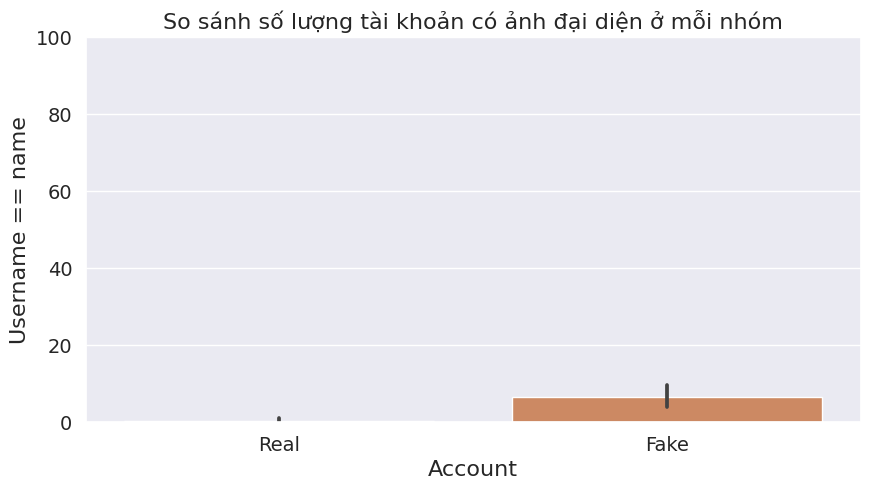

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'fake', y = 'name==username')
x = [0,1]
labels = ['Real','Fake']
plt.xticks(x, labels, fontsize = 14)
y = [0, 0.2, 0.4, 0.6, 0.8, 1]
labelsy = ['0','20','40','60','80','100']
plt.yticks(y, labelsy, fontsize = 14)
plt.xlabel('Account', fontsize = 16)
plt.ylabel('Username == name', fontsize = 16)
plt.title('So sánh số lượng tài khoản có ảnh đại diện ở mỗi nhóm', fontsize = 16)
plt.show()

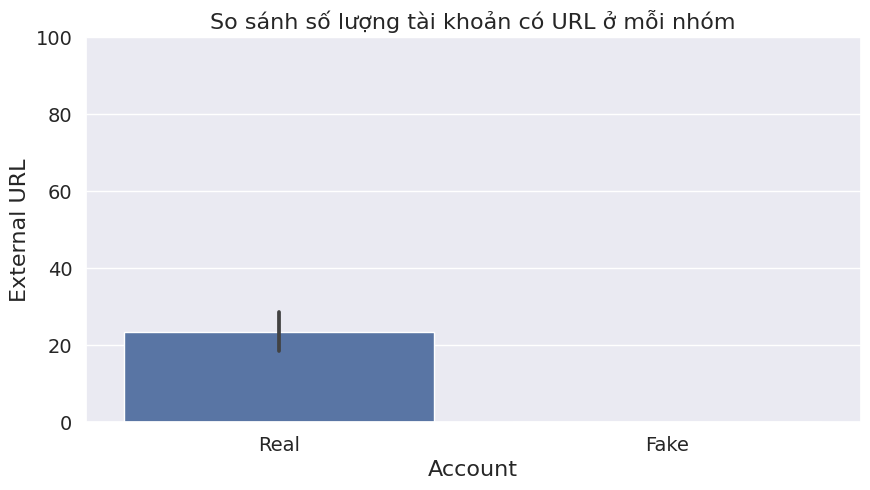

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'fake', y = 'external URL')
x = [0,1]
labels = ['Real','Fake']
plt.xticks(x, labels, fontsize = 14)
y = [0, 0.2, 0.4, 0.6, 0.8, 1]
labelsy = ['0','20','40','60','80','100']
plt.yticks(y, labelsy, fontsize = 14)
plt.xlabel('Account', fontsize = 16)
plt.ylabel('External URL', fontsize = 16)
plt.title('So sánh số lượng tài khoản có URL ở mỗi nhóm', fontsize = 16)
plt.show()

# Insight
1. URL: Hầu hết các tài khoản không có URL, nhưng các TK có URL trong Bio đều là tài khoản thật.
2. Hầu hết các tài khoản có Tên trùng với tên đăng nhập (username) đề là các tài khoản giả
3. Các tài khoản thật đều có ảnh đại diện, các tài khoản không có ảnh đại diện hầu hết là tài khoản giả.

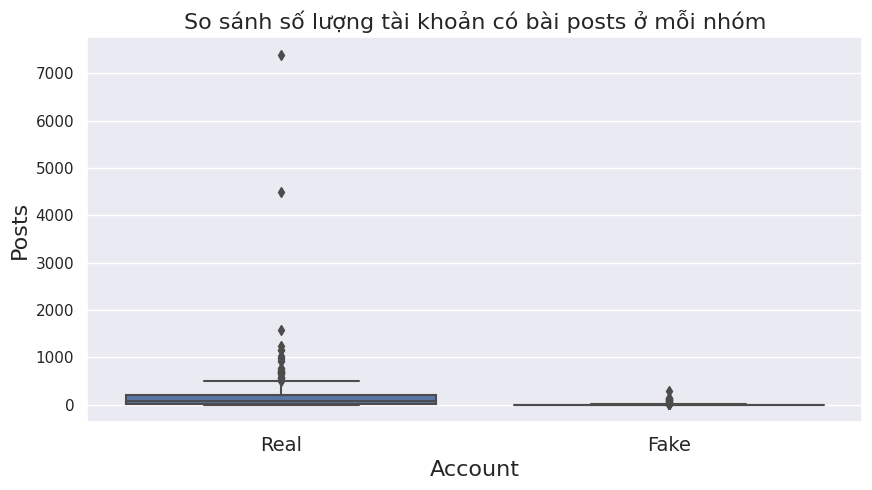

In [35]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'fake', y = '#posts', data = train)

x = [0,1]
labels = ['Real','Fake']
plt.xticks(x, labels, fontsize = 14)
plt.xlabel('Account', fontsize = 16)
plt.ylabel('Posts', fontsize = 16)
plt.title('So sánh số lượng tài khoản có bài posts ở mỗi nhóm', fontsize = 16)
plt.show()

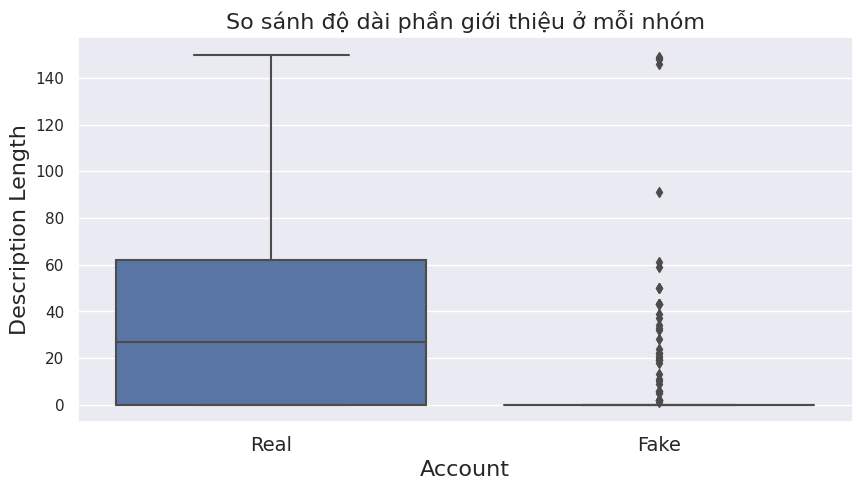

In [36]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'fake', y = 'description length', data = train)

x = [0,1]
labels = ['Real','Fake']
plt.xticks(x, labels, fontsize = 14)
plt.xlabel('Account', fontsize = 16)
plt.ylabel('Description Length', fontsize = 16)
plt.title('So sánh độ dài phần giới thiệu ở mỗi nhóm', fontsize = 16)
plt.show()

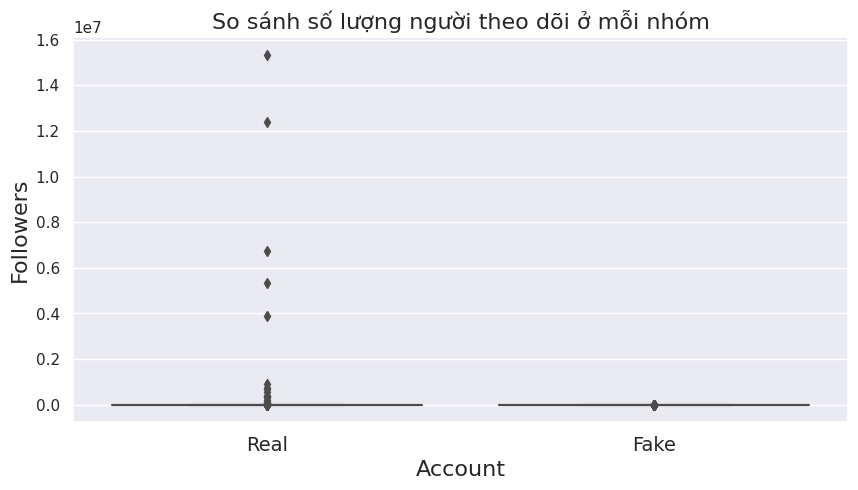

In [37]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'fake', y = '#followers', data = train)

x = [0,1]
labels = ['Real','Fake']
plt.xticks(x, labels, fontsize = 14)
plt.xlabel('Account', fontsize = 16)
plt.ylabel('Followers', fontsize = 16)
plt.title('So sánh số lượng người theo dõi ở mỗi nhóm', fontsize = 16)
plt.show()

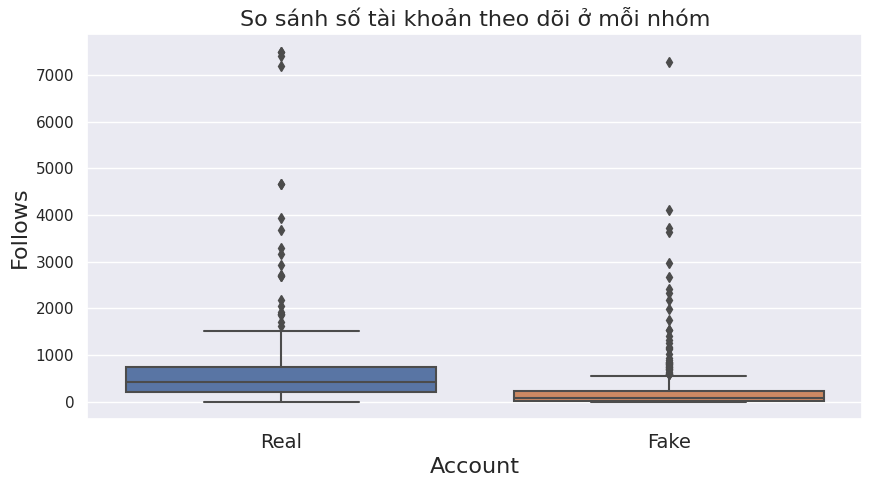

In [38]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'fake', y = '#follows', data = train)

x = [0,1]
labels = ['Real','Fake']
plt.xticks(x, labels, fontsize = 14)
plt.xlabel('Account', fontsize = 16)
plt.ylabel('Follows', fontsize = 16)
plt.title('So sánh số tài khoản theo dõi ở mỗi nhóm', fontsize = 16)
plt.show()

# Insight

1. Follows: TK thật thường theo dõi nhiều tk khác hơn so với tk fake
2. Followers: TK thật thường có nhiều người theo dõi hơn so với tk fake
3. Posts: TK thật có nhiều bài đăng hơn tk fake
4. Bio: TK thật thường có phần giới thiệu dài/nhiều hơn so với tk fake

<Axes: >

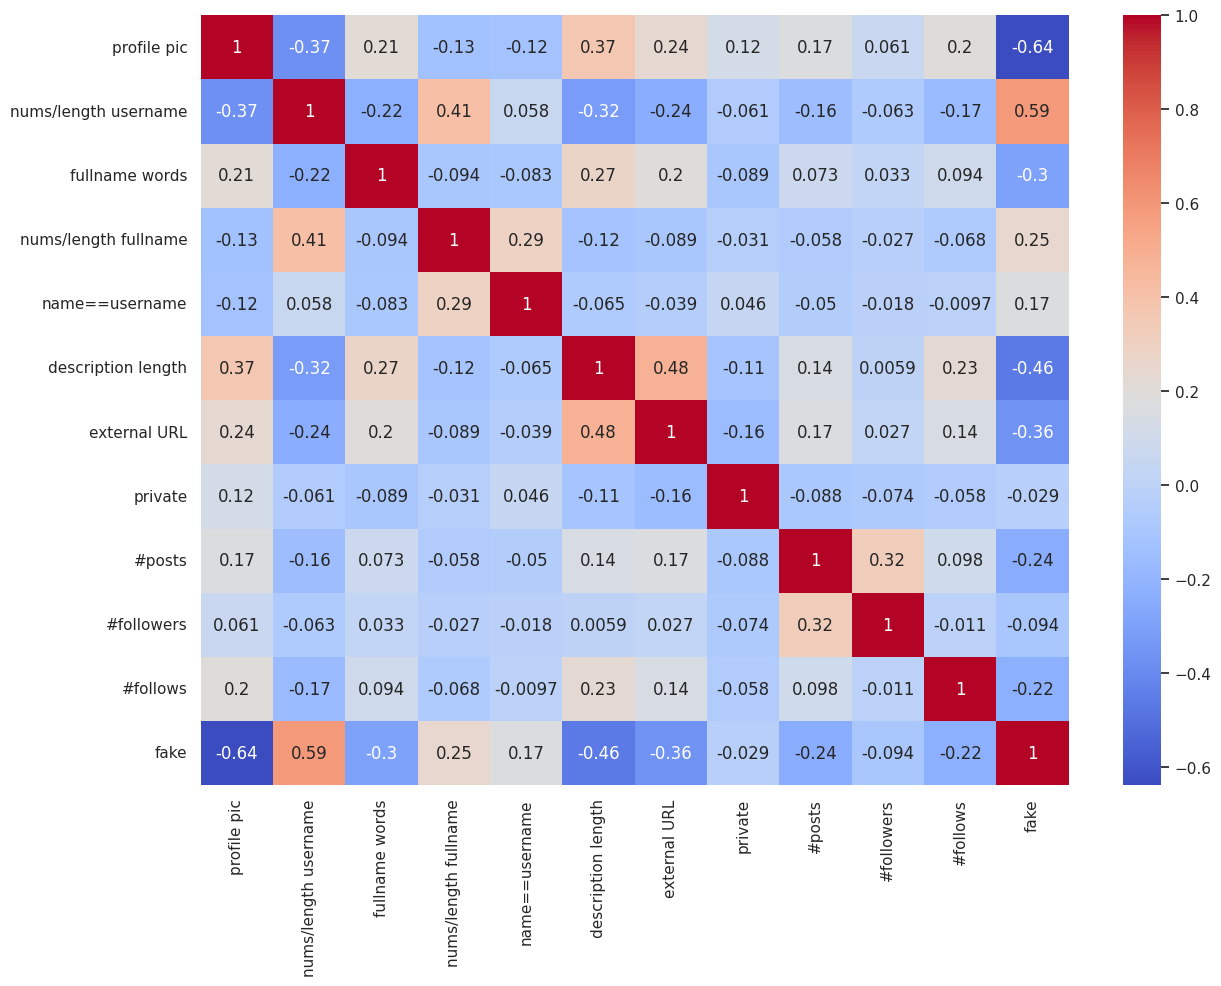

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(), annot = True, cmap = 'coolwarm')

<Axes: >

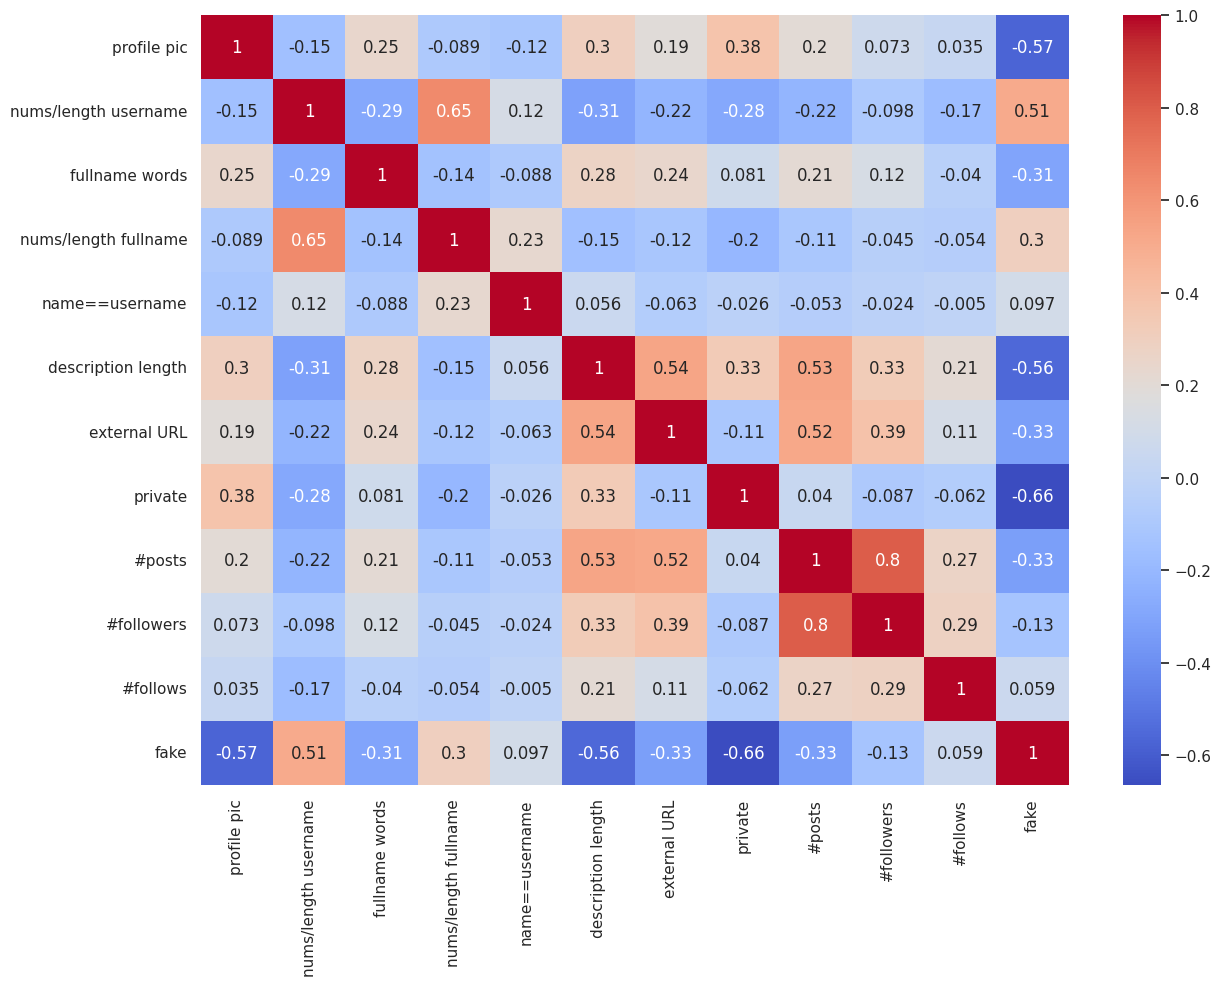

In [40]:
plt.figure(figsize = (14,10))
sns.heatmap(test.corr(), annot = True, cmap = 'coolwarm')

In [42]:
x_train = train.iloc[:,:-1].values
y_train = train.fake
x_test = test.iloc[:,:-1].values
y_test = test.fake

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
cnf_matrix

array([[52,  8],
       [ 3, 55]])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9067796610169492

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.87      0.95      0.91        58

    accuracy                           0.91       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118



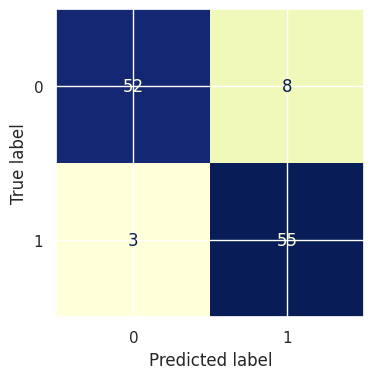

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize = (4,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, ax = ax, colorbar = False, cmap = 'YlGnBu')

Text(46.25, 0.5, 'Dự báo')

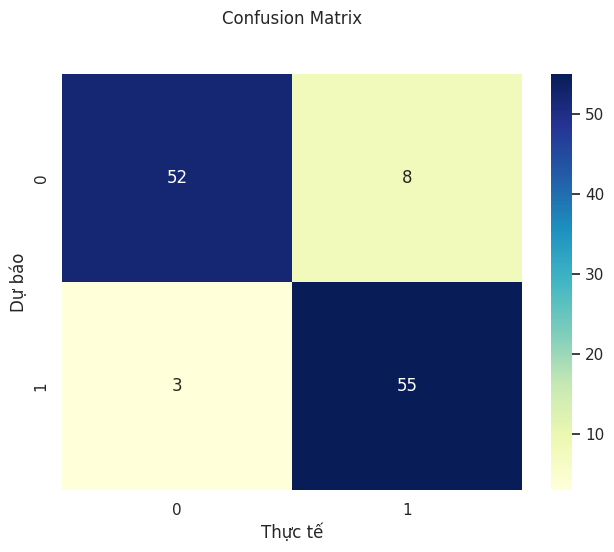

In [60]:
from sklearn import metrics

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')



In [64]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(x_train, y_train)
y_predictNB = modelNB.predict(x_test)
y_predictNB

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
accuracy_score(y_test, y_predictNB)

0.6101694915254238

In [65]:
cnf_matrix_NB = confusion_matrix(y_test, y_predictNB)
cnf_matrix_NB

array([[20, 40],
       [ 6, 52]])

Text(46.25, 0.5, 'Dự báo')

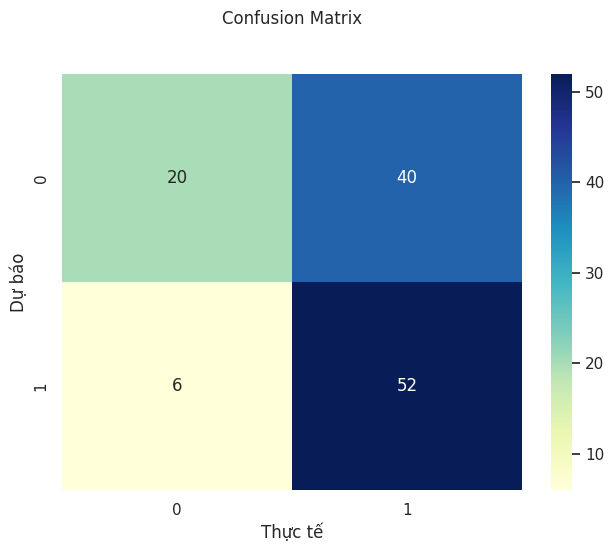

In [66]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NB), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')

In [71]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_predict_tree = model_tree.predict(x_test)
y_predict_tree

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
accuracy_score(y_test, y_predict_tree)

0.9067796610169492

In [73]:
cnf_matrix_tree = confusion_matrix(y_test, y_predict_tree)
cnf_matrix_tree

array([[54,  6],
       [ 5, 53]])

Text(46.25, 0.5, 'Dự báo')

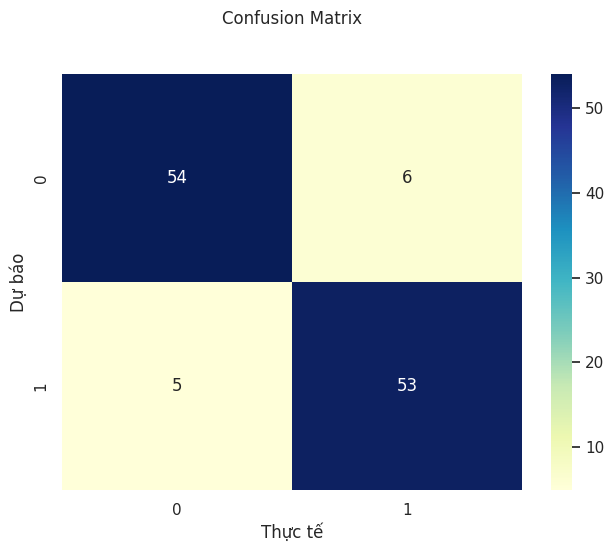

In [75]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_tree), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')

In [77]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=20) # số lượng cây quyết định được sử dụng trong mô hình
model_rf.fit(x_train, y_train)
y_predict_rf = model_rf.predict(x_test)
y_predict_rf

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

In [78]:
accuracy_score(y_test, y_predict_rf)

0.923728813559322

In [79]:
cnf_matrix_rf = confusion_matrix(y_test, y_predict_rf)
cnf_matrix_rf

array([[57,  3],
       [ 6, 52]])

Text(46.25, 0.5, 'Dự báo')

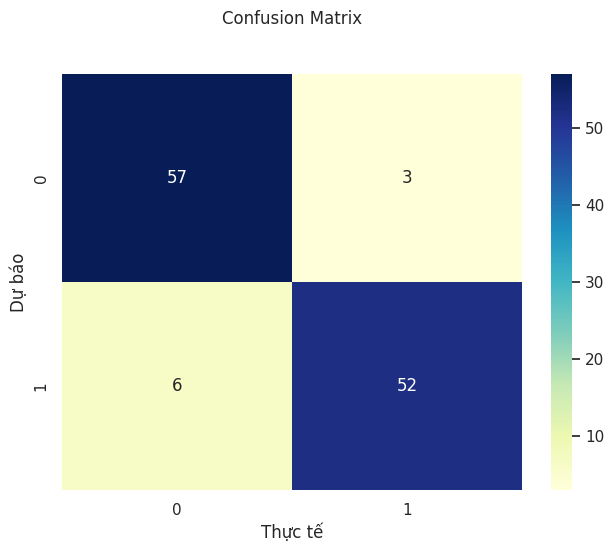

In [80]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')

In [81]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(x_train, y_train)
y_predict_knn = model_knn.predict(x_test)
y_predict_knn

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

In [82]:
accuracy_score(y_test, y_predict_knn)

0.864406779661017

In [83]:
cnf_matrix_knn = confusion_matrix(y_test, y_predict_knn)
cnf_matrix_knn

array([[55,  5],
       [11, 47]])

Text(46.25, 0.5, 'Dự báo')

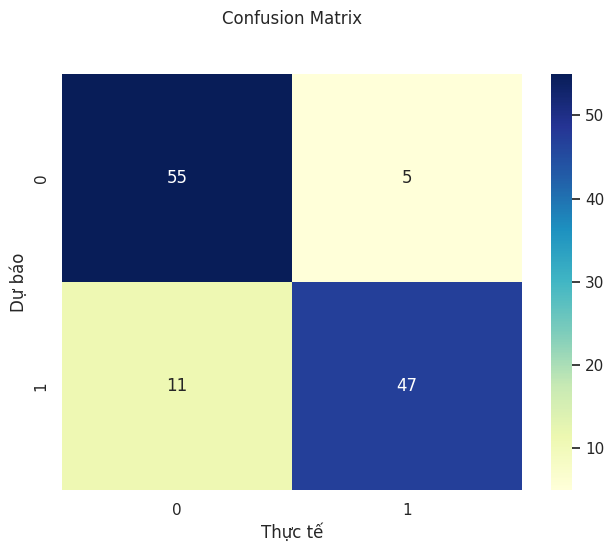

In [84]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')

In [85]:
from sklearn.svm import SVC

model_svc = SVC(kernel = 'linear', C = 0.1 , gamma = 0.3, probability = True)
model_svc.fit(x_train, y_train)
y_predict_svc = model_svc.predict(x_test)
y_predict_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
accuracy_score(y_test, y_predict_svc)

0.9067796610169492

In [87]:
cnf_matrix_svc = confusion_matrix(y_test, y_predict_svc)
cnf_matrix_svc

array([[53,  7],
       [ 4, 54]])

Text(46.25, 0.5, 'Dự báo')

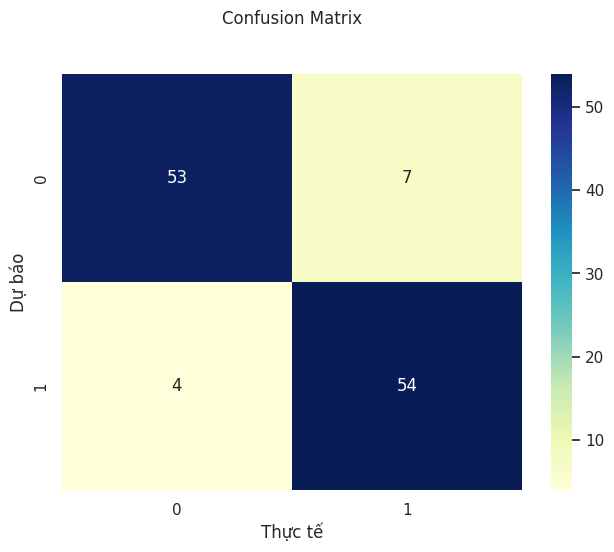

In [88]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')

In [93]:
import datetime
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(),
    GaussianNB(),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators = 20),
    tree.DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors = int(10))
]

CV = 5
entries = []
i = 0

for model in models:
  scores_train = []
  scores_test = []
  times = []
  abs_scores = []
  for j in range(CV):
    t1 = datetime.datetime.now()
    model_name = model.__class__.__name__
    model.fit(x_train, y_train)
    t2 = datetime.datetime.now()
    d = round((t2-t1).microseconds/1000,1) #miliseconds
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    abs_score = abs(score_train - score_test)

    scores_train.append(score_train)
    scores_test.append(score_test)
    abs_scores.append(abs_score)
    times.append(d)


  print(model.__class__.__name__, scores_test)
  entries.append([model_name, np.array(scores_train).mean(), np.array(scores_test).mean(), np.array(abs_scores).mean(), np.array(times).mean()])
  i += 1

cv_df = pd.DataFrame(entries, columns = ['model_name','score_train_mean','score_test_mean','abs|score|','time_mean'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

LogisticRegression [0.9067796610169492, 0.9067796610169492, 0.9067796610169492, 0.9067796610169492, 0.9067796610169492]
GaussianNB [0.6101694915254238, 0.6101694915254238, 0.6101694915254238, 0.6101694915254238, 0.6101694915254238]
SVC [0.8898305084745762, 0.8898305084745762, 0.8898305084745762, 0.8898305084745762, 0.8898305084745762]
RandomForestClassifier [0.923728813559322, 0.940677966101695, 0.8983050847457628, 0.9152542372881356, 0.9152542372881356]
DecisionTreeClassifier [0.8813559322033898, 0.8813559322033898, 0.8983050847457628, 0.8898305084745762, 0.8983050847457628]
KNeighborsClassifier [0.864406779661017, 0.864406779661017, 0.864406779661017, 0.864406779661017, 0.864406779661017]


In [94]:
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,LogisticRegression,0.914634,0.906780,0.007854,87.98
1,GaussianNB,0.689895,0.610169,0.079726,2.64
2,SVC,0.923345,0.889831,0.033514,534.50
3,RandomForestClassifier,0.998258,0.918644,0.079614,41.52
4,DecisionTreeClassifier,1.000000,0.889831,0.110169,2.32
5,KNeighborsClassifier,0.909408,0.864407,0.045001,1.72


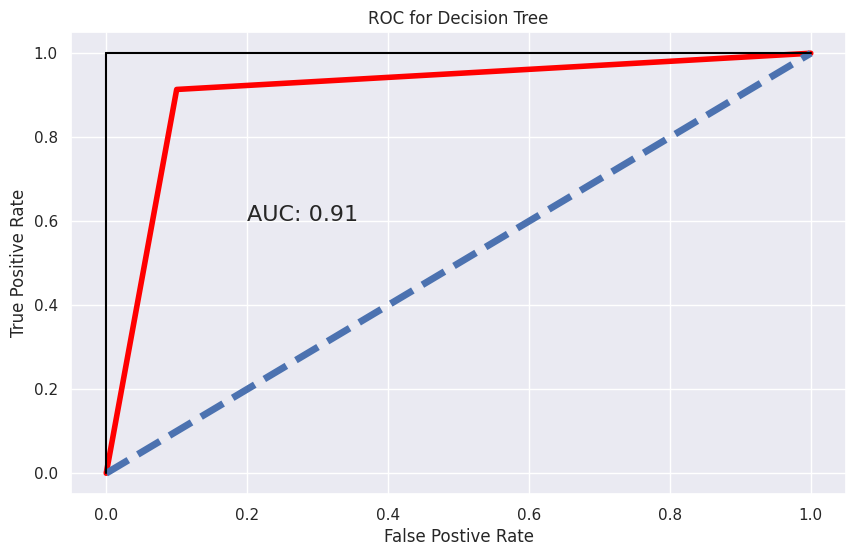

In [101]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probabilities = model_tree.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)
plt.figure(figsize = (10,6))
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth = 4, color ='red')
plt.plot([0,1], ls = '--', linewidth = 5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2, 0.6, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size = 16)
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

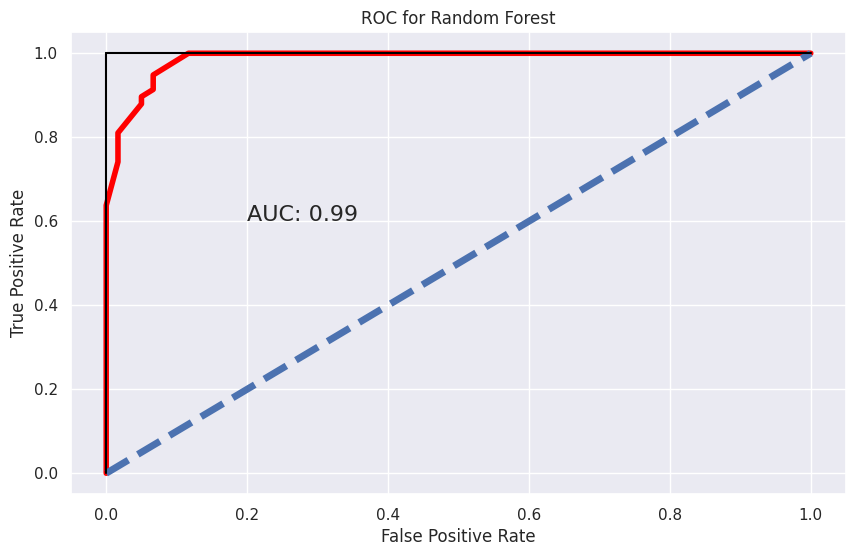

In [106]:
y_probabilities = model_rf.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)
plt.figure(figsize = (10,6))
plt.title('ROC for Random Forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red', label = 'AUC')
plt.plot([0,1], ls = '--', linewidth = 5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2, 0.6, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size = 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

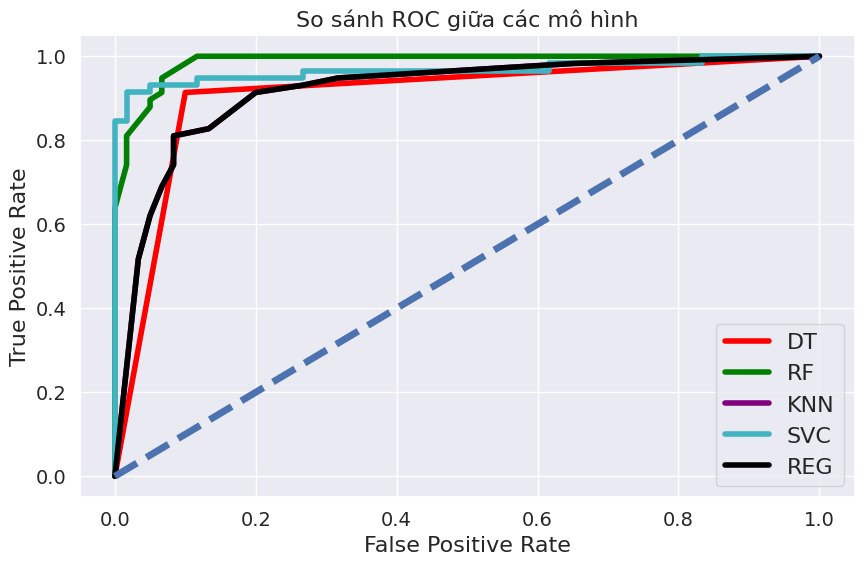

In [114]:
plt.figure(figsize=(10,6))

#DT
y_probabilities_1 = model_tree.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_1)
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red', label = 'AUC')

#RF
y_probabilities_2 = model_rf.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_2)
plt.title('ROC for Random Forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green', label = 'AUC')

#KNN
y_probabilities_3 = model_knn.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_3)
plt.title('ROC for KNN')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='purple', label = 'AUC')

#SVC
y_probabilities_4 = model_svc.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_4)
plt.title('ROC for SVC')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#42b4c1', label = 'AUC')

#REG
y_probabilities_5 = model.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_5)
plt.title('ROC for Reg')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='black', label = 'AUC')

plt.plot([0,1],ls='--',linewidth=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('So sánh ROC giữa các mô hình', fontsize=16)
plt.legend(['DT', 'RF', 'KNN', 'SVC','REG'], fontsize=16 )

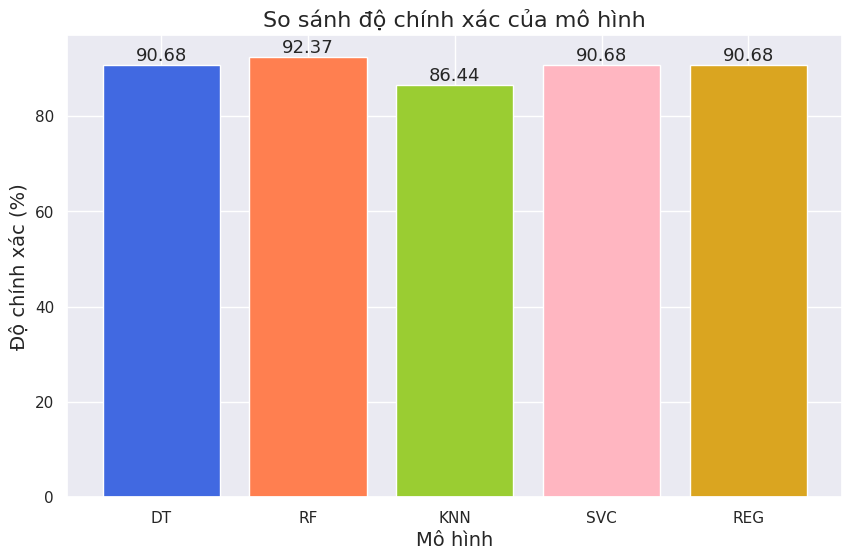

In [116]:
DT_score = accuracy_score(y_test, y_predict_tree)
RF_score = accuracy_score(y_test, y_predict_rf)
KNN_score = accuracy_score(y_test, y_predict_knn)
SVC_score = accuracy_score(y_test, y_predict_svc)
REG_score = accuracy_score(y_test, y_predict)

accuracy_scores = [DT_score, RF_score, KNN_score, SVC_score, REG_score]
model = ['DT','RF','KNN','SVC','REG']
accuracy_score = [round(x*100,2) for x in accuracy_scores] #Nhân các giá trị của accuracy_score với 100 và làm tròn tới 2 số sau dấu phẩy

plt.figure(figsize=(10,6))
palette = ['royalblue','coral','yellowgreen','lightpink','goldenrod','rebeccapurple']
plt.bar(model, accuracy_score, color = palette)
for i,v in enumerate(accuracy_score):
  plt.text(i, v+1, str(v), ha='center', fontsize=13)

plt.xlabel("Mô hình", fontsize=14)
plt.ylabel("Độ chính xác (%)", fontsize=14)
plt.title("So sánh độ chính xác của mô hình", fontsize=16)
plt.show()

**=> Mô hình RF đạt điểm hiệu quả tốt nhất**